In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df=pd.read_csv('worldwide-aggregate_csv.csv')

In [9]:
df.head()

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,557,30,17,NaN
1,2020-01-23,655,32,18,17.594255
2,2020-01-24,941,39,26,43.664122
3,2020-01-25,1433,42,42,52.284803
4,2020-01-26,2118,56,56,47.801814


In [5]:
df.shape

(368, 5)

In [12]:
df.describe()

,Confirmed,Recovered,Deaths,Increase rate
count,3.680000e+02,3.680000e+02,3.680000e+02,367.000000
mean,2.646932e+07,1.605498e+07,7.296585e+05,3.575489
std,2.845885e+07,1.705729e+07,6.053513e+05,7.780060
min,5.570000e+02,3.000000e+01,1.700000e+01,0.483448
25%,2.714182e+06,7.317282e+05,1.944635e+05,0.970126
50%,1.564783e+07,8.937800e+06,6.331940e+05,1.448964
75%,4.236233e+07,2.865036e+07,1.146776e+06,2.296686
max,9.874427e+07,5.443585e+07,2.120578e+06,90.570550


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           368 non-null    object 
 1   Confirmed      368 non-null    int64  
 2   Recovered      368 non-null    int64  
 3   Deaths         368 non-null    int64  
 4   Increase rate  367 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 14.5+ KB


In [14]:
df.dtypes

Date              object
Confirmed          int64
Recovered          int64
Deaths             int64
Increase rate    float64
dtype: object

In [25]:
df.drop(['Date'],axis=1,inplace=True)

In [26]:
#df.Date.value_counts()

In [27]:
#df_frequency_map=df.Date.value_counts().to_dict
#df.Date.head()

In [28]:
df.isnull().sum()

Confirmed        0
Recovered        0
Deaths           0
Increase rate    1
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

Confirmed        0
Recovered        0
Deaths           0
Increase rate    0
dtype: int64

<AxesSubplot:xlabel='Increase rate', ylabel='Deaths'>

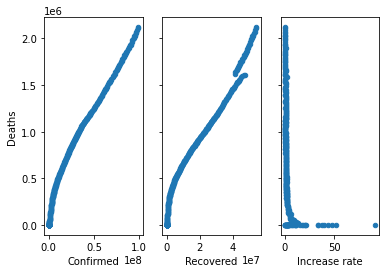

In [36]:
fig,axs=plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='Confirmed',y='Deaths',ax=axs[0])
df.plot(kind='scatter',x='Recovered',y='Deaths',ax=axs[1])
df.plot(kind='scatter',x='Increase rate',y='Deaths',ax=axs[2])

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [38]:
scaled_values=sc.fit_transform(df)

In [39]:
scaled_values

array([[-0.93370639, -0.94494553, -1.2110075 ,  1.80434385],
       [-0.93369633, -0.94494512, -1.21099426,  5.15977506],
       [-0.93367902, -0.94494494, -1.21096778,  6.26933587],
       ...,
       [ 2.49699007,  2.2090333 ,  2.25087369, -0.37292012],
       [ 2.52014653,  2.23149707,  2.27715033, -0.37332293],
       [ 2.54009921,  2.2502763 ,  2.29898932, -0.3858443 ]])

In [51]:
df.columns

Index(['Confirmed', 'Recovered', 'Deaths', 'Increase rate'], dtype='object')

In [53]:
df=pd.DataFrame(scaled_values,columns=['Confirmed', 'Recovered','Deaths','Increase rate'])

<AxesSubplot:>

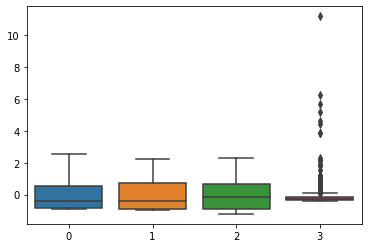

In [40]:
sns.boxplot(data=scaled_values)

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

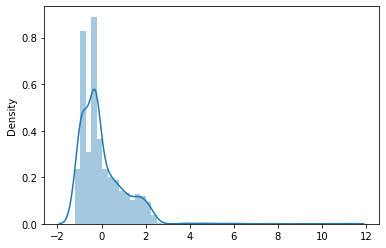

In [41]:
sns.distplot(scaled_values)

In [42]:
up=df['Increase rate'].mean()+3*df['Increase rate'].mean()
lp=df['Increase rate'].mean()-3*df['Increase rate'].mean()
print('Upper boundry',up),print('lower bondry',lp),print('mean',df['Increase rate'].mean())

Upper boundry 14.30195637585748
lower bondry -7.150978187928741
mean 3.57548909396437


(None, None, None)

Text(0, 0.5, 'Recovered')

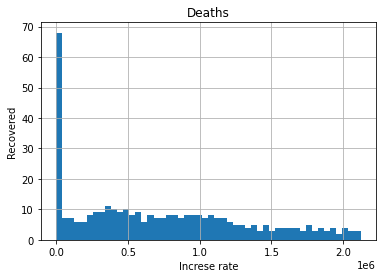

In [43]:
figure=df.Deaths.hist(bins=50)
#fig=df.Fare.hist(bins=50)
figure.set_title('Deaths')
figure.set_xlabel('Increse rate')
figure.set_ylabel('Recovered')

In [44]:
IQR=df.Deaths.quantile(0.75)-df.Deaths.quantile(0.25)

In [45]:
lb=df['Deaths'].quantile(0.25)-(3*IQR)
ub=df['Deaths'].quantile(0.75)+(3*IQR)
print('upper bridge=',ub),print('lower bridge',lb)

upper bridge= 3994330.5
lower bridge -2646569.5


(None, None)

In [46]:
data=df.copy()

Text(0, 0.5, 'Increse rate')

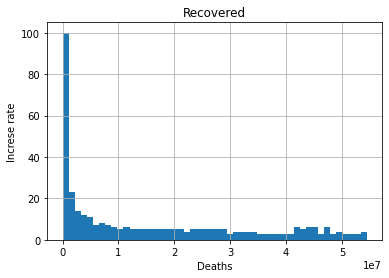

In [47]:
figure=data.Recovered.hist(bins=50)
figure.set_title('Recovered')
figure.set_xlabel('Deaths')
figure.set_ylabel('Increse rate')

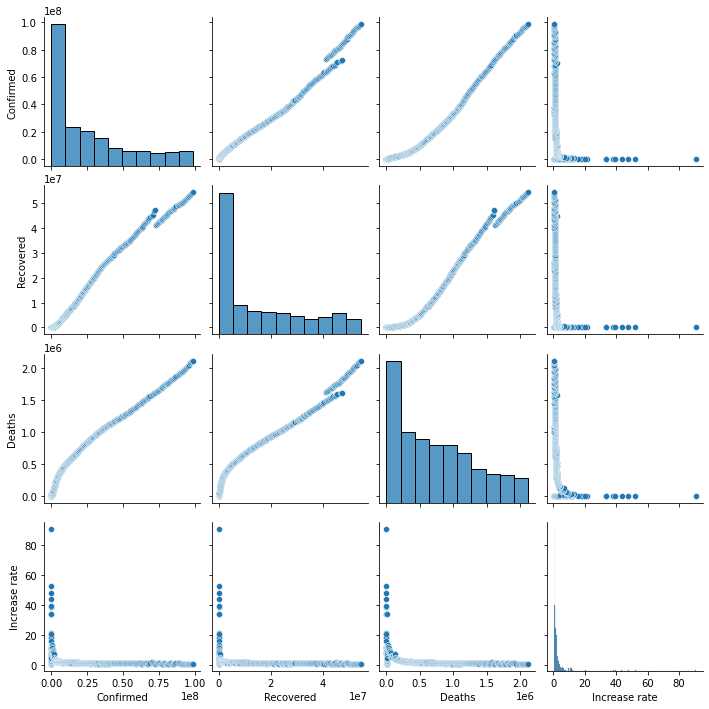

In [48]:
sns.pairplot(df)

In [49]:
df.corr()

,Confirmed,Recovered,Deaths,Increase rate
Confirmed,1.000000,0.992954,0.980531,-0.306314
Recovered,0.992954,1.000000,0.982752,-0.312649
Deaths,0.980531,0.982752,1.000000,-0.380154
Increase rate,-0.306314,-0.312649,-0.380154,1.000000


<AxesSubplot:ylabel='Count'>

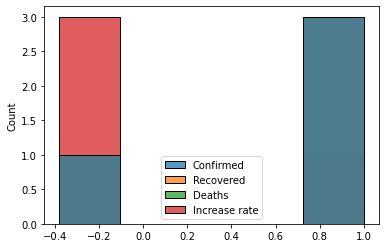

In [110]:
sns.histplot(df.corr())

C:\Users\Komal\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

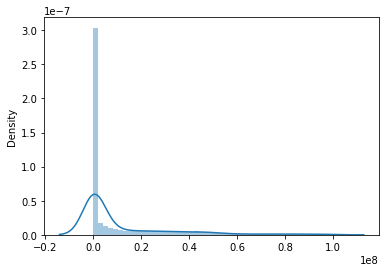

In [112]:
sns.distplot(df)

<AxesSubplot:>

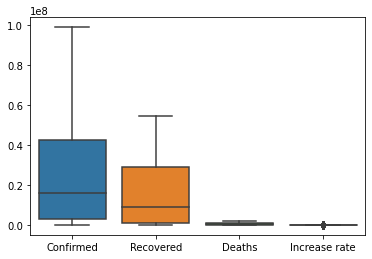

In [113]:
sns.boxplot(data=df)

In [56]:
x=df[['Confirmed','Recovered','Increase rate']]
y=df.Deaths

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [59]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [60]:
lm.score(x_train,y_train)

0.9749695391912326

In [61]:
lm.score(x_test,y_test)

0.9683529749370209